<a href="https://colab.research.google.com/github/jeremiahzhao/Titanic-Machine-Learning/blob/main/Titanic_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle
!pip install pycaret
!pip install catboost

     |████████████████████████████████| 318 kB 8.9 MB/s 
     |████████████████████████████████| 167 kB 42.3 MB/s 
     |████████████████████████████████| 86 kB 5.4 MB/s 
     |████████████████████████████████| 2.0 MB 40.8 MB/s 
     |████████████████████████████████| 114 kB 15.0 MB/s 
     |████████████████████████████████| 1.7 MB 39.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.3 MB 47.2 MB/s 
     |████████████████████████████████| 6.8 MB 50.9 MB/s 
     |████████████████████████████████| 56 kB 4.5 MB/s 
     |████████████████████████████████| 16.5 MB 37.6 MB/s 
     |████████████████████████████████| 261 kB 56.7 MB/s 
     |████████████████████████████████| 10.9 MB 51.3 MB/s 
     |████████████████████████████████| 636 kB 66.8 MB/s 
     |████████████████████████████████| 3.1 MB 46.1 MB/s 
     |████████████████

     |████████████████████████████████| 76.1 MB 1.3 MB/s 


In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jeremiahzhao","key":"e80972d45f2e8754d8e7c893171b2607"}'}

In [2]:
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle competitions list

ref                                                         deadline             category            reward  teamCount  userHasEntered  
----------------------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
mpetitions/contradictory-my-dear-watson                     2030-07-01 23:59:00  Getting Started     Prizes         53           False  
mpetitions/gan-getting-started                              2030-07-01 23:59:00  Getting Started     Prizes         82           False  
mpetitions/store-sales-time-series-forecasting              2030-06-30 23:59:00  Getting Started  Knowledge       1264           False  
mpetitions/tpu-getting-started                              2030-06-03 23:59:00  Getting Started  Knowledge        136           False  
mpetitions/digit-recognizer                                 2030-01-01 00:00:00  Getting Started  Knowledge       1926           False  
mpetitions/titanic                       

In [4]:
!kaggle competitions download -c titanic

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 27.2MB/s]


In [5]:
!unzip titanic.zip

Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [6]:
# Data Analysis and wrangling
import pandas as pd
import numpy as np
import pandas_profiling

pd.set_option('max_columns', None)
pd.set_option('max_rows', 90)
import warnings
warnings.filterwarnings('ignore')


# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(rc={'figure.figsize':(11,8)})

# Preprocessing for models
from sklearn.preprocessing import StandardScaler

# Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier
from pycaret.classification import *
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import KFold,cross_val_score,GridSearchCV



# Model Performance
from sklearn import metrics 
from sklearn.metrics import classification_report, plot_roc_curve, plot_confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score


from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import make_scorer

In [7]:
#Getting Started. Here we're just looking at what features the tables present and 
#understanding the different data points we have on each passenger.
train0 = pd.read_csv('train.csv')
train0.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
test0 = pd.read_csv('test.csv')
test0.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
#We combine the train and test dataframes so we can do further analysis as a whole.

target = train0['Survived']
test_ids = test0['PassengerId']

train1 = train0.drop(['PassengerId', 'Survived', 'Ticket', 'Cabin'], axis =1)
test1 = test0.drop(['PassengerId', 'Ticket', 'Cabin'], axis = 1)

data1 = pd.concat([train1, test1], axis = 0).reset_index(drop=True)
data1.info()
print('-' * 40)
data1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Name      1309 non-null   object 
 2   Sex       1309 non-null   object 
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Fare      1308 non-null   float64
 7   Embarked  1307 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 81.9+ KB
----------------------------------------


,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
1304,3,"Spector, Mr. Woolf",male,NaN,0,0,8.0500,S
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C
1306,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S
1307,3,"Ware, Mr. Frederick",male,NaN,0,0,8.0500,S


In [10]:
#We check for any missing data. Here we see a number of data points missing. We will deal with this later.

print(train0.isna().sum())
print('-' * 40)
print(data1.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------------------------------------
Pclass        0
Name          0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Embarked      2
dtype: int64


In [11]:
train0.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


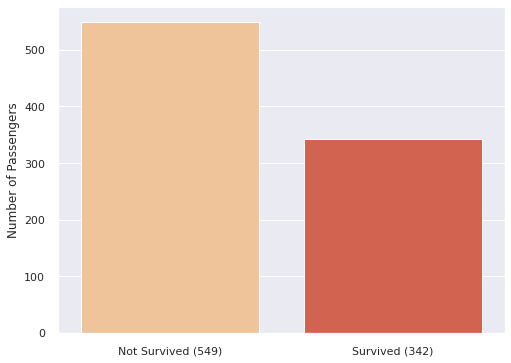

In [12]:
#EDA
#We are looking at specific breakdown of the passengers that survived and didn't

sum_of_survived = train0['Survived'].value_counts()[1]
sum_of_not_survived = train0['Survived'].value_counts()[0]


plt.figure(figsize = (8,6))
sns.set_context('notebook', font_scale = 1)
sns.set_style('darkgrid')
sns.countplot(data =train0, x= 'Survived', palette = 'OrRd')

plt.title('')
plt.ylabel('Number of Passengers')
plt.xlabel('')
plt.xticks((0,1), ['Not Survived ({})'.format(sum_of_not_survived), "Survived ({})".format(sum_of_survived)])
plt.show()

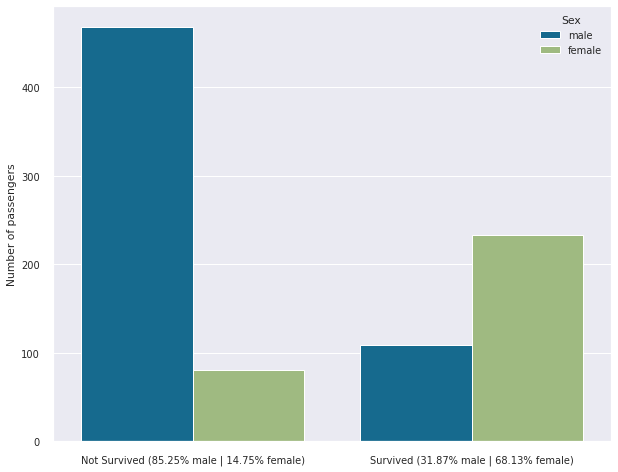

In [13]:
# We take a step further to analyze if the sex of the passengers increased their chance of survivability.

male_not_survived = train0.loc[(train0['Sex'] == 'male'),'Survived'].value_counts()[0]
female_not_survived = train0.loc[(train0['Sex']== 'female'), 'Survived'].value_counts()[0]
per_not_male = round((male_not_survived * 100)/(male_not_survived + female_not_survived),2)
per_not_female = round((female_not_survived * 100)/(male_not_survived + female_not_survived),2)

male_survived = train0.loc[(train0['Sex'] == 'male'),'Survived'].value_counts()[1]
female_survived = train0.loc[(train0['Sex']== 'female'), 'Survived'].value_counts()[1]
per_male = round((male_survived * 100)/(male_survived + female_survived),2)
per_female = round((female_survived * 100)/(male_survived + female_survived),2)

plt.figure(figsize=(10,8))
sns.set_context('notebook',font_scale=0.9)
sns.set_style('darkgrid')
sns.countplot(data = train0, x = 'Survived', hue = 'Sex')

plt.title('')
plt.ylabel('Number of passengers')
plt.xlabel('')
plt.xticks((0,1),['Not Survived ({}% male | {}% female)'.format(per_not_male,per_not_female),"Survived ({}% male | {}% female)".format(per_male,per_female)])
plt.show()


   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


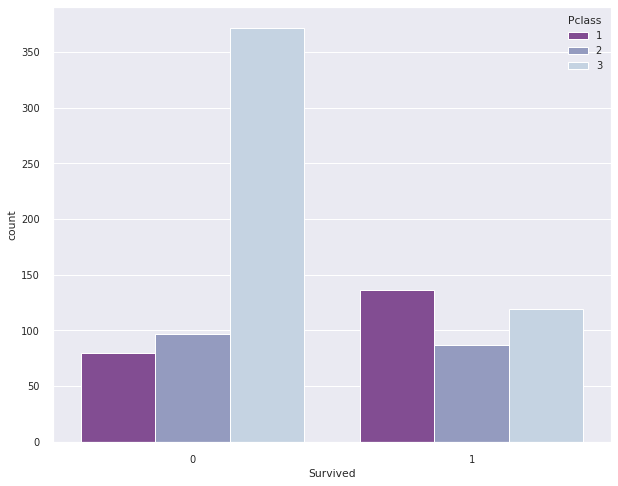

In [14]:
# Here we see a breakdown of what class ticket the passengers bought and how many of them ended up surviving.

print(train0[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by = 'Survived', ascending =False))

plt.figure(figsize = (10,8))
sns.countplot(data = train0, x = 'Survived', hue = 'Pclass', palette = 'BuPu_r')
plt.show()

In [15]:
train0.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


   Family  Survived
3       4  0.724138
2       3  0.578431
1       2  0.552795
6       7  0.333333
0       1  0.303538
4       5  0.200000
5       6  0.136364
7       8  0.000000
8      11  0.000000


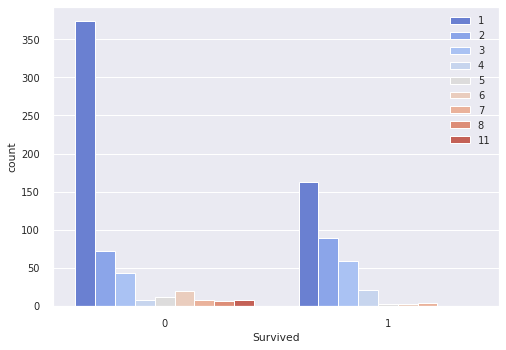

In [16]:
#This graph seeks to show if the passengers with family had a higher survival rate.

temp = train0.copy()
temp['Family'] = train0['SibSp'] + train0['Parch'] + 1
print(temp[['Family', 'Survived']].groupby('Family', as_index = False).mean().sort_values(by = 'Survived', ascending = False))

ax = sns.countplot(data = temp, x = 'Survived', hue = 'Family',palette='coolwarm')
ax.legend(loc = 'upper right')
plt.show()

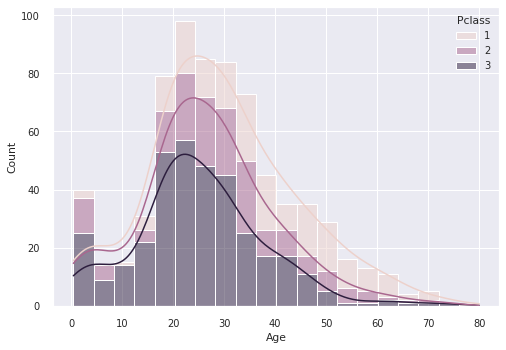

In [17]:
# Here we breakdown the ages and boat class of those who on the Titanic.
sns.histplot(data = train0, x = 'Age', hue = 'Pclass', multiple = 'stack', kde = True)

In [19]:
#Data Cleaning

data2 = data1.copy()
data2.isna().sum()


Pclass        0
Name          0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Embarked      2
dtype: int64

In [ ]:
# We are filling the missing categorical values in 'Embarked' with the mode of the set

data2['Embarked'] = data2["Embarked"].fillna(data2['Embarked'].mode()[0])

In [20]:
data2 = data2.drop(columns ='Name')
data2.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [21]:
# We are converting Sex into a binary option for analysis later on.

cat_variables = data2['Sex']
cat_dummies = pd.get_dummies(cat_variables, drop_first=True)
cat_dummies.head()

,male
0,1
1,0
2,0
3,0
4,1


In [22]:
# Here we are concatenating the binary option for Sex back into the dataframe. 
data2 = data2.drop(['Sex', 'Embarked'], axis=1)
data2 = pd.concat([data2, cat_dummies], axis=1)
data2.head()

,Pclass,Age,SibSp,Parch,Fare,male
0,3,22.0,1,0,7.2500,1
1,1,38.0,1,0,71.2833,0
2,3,26.0,0,0,7.9250,0
3,1,35.0,1,0,53.1000,0
4,3,35.0,0,0,8.0500,1


In [23]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler


In [24]:
# We are running the MinMaxScalar to convert all numeric values on a scale of 0 to 1.

scaler = MinMaxScaler()
data2 = pd.DataFrame(scaler.fit_transform(data2), columns = data2.columns)
data2.head()

,Pclass,Age,SibSp,Parch,Fare,male
0,1.0,0.273456,0.125,0.0,0.014151,1.0
1,0.0,0.473882,0.125,0.0,0.139136,0.0
2,1.0,0.323563,0.000,0.0,0.015469,0.0
3,0.0,0.436302,0.125,0.0,0.103644,0.0
4,1.0,0.436302,0.000,0.0,0.015713,1.0


In [25]:
# We are looking to run a k-nearest neighbors to fill the rest of the missing data. We chose the nearest 5 neighbors.

imputer = KNNImputer(n_neighbors=5)
data2 = pd.DataFrame(imputer.fit_transform(data2),columns = data2.columns)

In [26]:
data2.isna().sum()

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
male      0
dtype: int64

In [27]:
data1

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
1304,3,"Spector, Mr. Woolf",male,NaN,0,0,8.0500,S
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C
1306,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S
1307,3,"Ware, Mr. Frederick",male,NaN,0,0,8.0500,S


In [28]:
data3 = data2.copy()
data3 = pd.concat([data3, data1['Embarked']], axis = 1)
data3

,Pclass,Age,SibSp,Parch,Fare,male,Embarked
0,1.0,0.273456,0.125,0.000000,0.014151,1.0,S
1,0.0,0.473882,0.125,0.000000,0.139136,0.0,C
2,1.0,0.323563,0.000,0.000000,0.015469,0.0,S
3,0.0,0.436302,0.125,0.000000,0.103644,0.0,S
4,1.0,0.436302,0.000,0.000000,0.015713,1.0,S
...,...,...,...,...,...,...,...
1304,1.0,0.497683,0.000,0.000000,0.015713,1.0,S
1305,0.0,0.486409,0.000,0.000000,0.212559,0.0,C
1306,1.0,0.480145,0.000,0.000000,0.014151,1.0,S
1307,1.0,0.497683,0.000,0.000000,0.015713,1.0,S


In [38]:
data3['Embarked'] = data3["Embarked"].fillna(data3['Embarked'].mode()[0])

,Pclass,Age,SibSp,Parch,Fare,male,Embarked
0,1.0,0.273456,0.125,0.000000,0.014151,1.0,0
1,0.0,0.473882,0.125,0.000000,0.139136,0.0,1
2,1.0,0.323563,0.000,0.000000,0.015469,0.0,0
3,0.0,0.436302,0.125,0.000000,0.103644,0.0,0
4,1.0,0.436302,0.000,0.000000,0.015713,1.0,0
...,...,...,...,...,...,...,...
1304,1.0,0.497683,0.000,0.000000,0.015713,1.0,0
1305,0.0,0.486409,0.000,0.000000,0.212559,0.0,1
1306,1.0,0.480145,0.000,0.000000,0.014151,1.0,0
1307,1.0,0.497683,0.000,0.000000,0.015713,1.0,0


In [ ]:
#Mapping Embarked. We now convert the 'Embarked' column into a numeric column as well.
data3['Embarked'] = data3['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)



In [41]:
data4 =data3.copy()
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   float64
 1   Age       1309 non-null   float64
 2   SibSp     1309 non-null   float64
 3   Parch     1309 non-null   float64
 4   Fare      1309 non-null   float64
 5   male      1309 non-null   float64
 6   Embarked  1309 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 71.7 KB


In [42]:
#We are now splitting the data back into the original train and test sets, except now with data cleaned up and ready for analysis.


train_final = data4.loc[:train0.index.max(), :].copy()
test_final = data4.loc[train0.index.max() + 1:, :].reset_index(drop=True).copy()

In [43]:
train_final.info()
print('_'*40)
test_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    float64
 1   Age       891 non-null    float64
 2   SibSp     891 non-null    float64
 3   Parch     891 non-null    float64
 4   Fare      891 non-null    float64
 5   male      891 non-null    float64
 6   Embarked  891 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 48.9 KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    float64
 1   Age       418 non-null    float64
 2   SibSp     418 non-null    float64
 3   Parch     418 non-null    float64
 4   Fare      418 non-null    float64
 5   male      418 non-null    float64
 6   Embarked  418 non-null    int64 

In [44]:
_ = setup(data = pd.concat([train_final,target],axis=1),target='Survived')


,Description,Value
0,session_id,4254
1,Target,Survived
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(891, 8)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,2
8,Ordinal Features,False
9,High Cardinality Features,False


In [45]:
compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8235,0.8606,0.7063,0.8103,0.7515,0.6161,0.6223,0.918
gbc,Gradient Boosting Classifier,0.8170,0.8611,0.7149,0.7886,0.7471,0.6046,0.6090,0.099
rf,Random Forest Classifier,0.8090,0.8489,0.7272,0.7644,0.7422,0.5910,0.5945,0.513
lightgbm,Light Gradient Boosting Machine,0.7994,0.8562,0.6940,0.7660,0.7244,0.5676,0.5729,0.075
ada,Ada Boost Classifier,0.7898,0.8446,0.7024,0.7392,0.7185,0.5510,0.5530,0.106
ridge,Ridge Classifier,0.7882,0.0000,0.6900,0.7476,0.7136,0.5464,0.5512,0.014
knn,K Neighbors Classifier,0.7880,0.8461,0.6855,0.7413,0.7094,0.5434,0.5470,0.120
lr,Logistic Regression,0.7866,0.8436,0.6817,0.7497,0.7096,0.5419,0.5475,0.336
lda,Linear Discriminant Analysis,0.7866,0.8415,0.6900,0.7430,0.7119,0.5432,0.5475,0.018
et,Extra Trees Classifier,0.7832,0.8243,0.7025,0.7285,0.7131,0.5392,0.5415,0.466


In [46]:
models = { 'gbc': GradientBoostingClassifier(),
          'catboost':CatBoostClassifier(),
          'ridge':RidgeClassifier(),
          'log_reg':LogisticRegression(),
          'random_f':RandomForestClassifier()
    }

In [47]:
for name, model in models.items():
    model.fit(train_final,target)
    print(name+ 'trained')

gbctrained
Learning rate set to 0.009807
0:	learn: 0.6863782	total: 909us	remaining: 908ms
1:	learn: 0.6800796	total: 2.27ms	remaining: 1.13s
2:	learn: 0.6740422	total: 3.47ms	remaining: 1.15s
3:	learn: 0.6679894	total: 4.72ms	remaining: 1.18s
4:	learn: 0.6622616	total: 6.12ms	remaining: 1.22s
5:	learn: 0.6564552	total: 7.09ms	remaining: 1.18s
6:	learn: 0.6507991	total: 8.12ms	remaining: 1.15s
7:	learn: 0.6454156	total: 9.34ms	remaining: 1.16s
8:	learn: 0.6393719	total: 10.6ms	remaining: 1.16s
9:	learn: 0.6340325	total: 11.8ms	remaining: 1.16s
10:	learn: 0.6299320	total: 13ms	remaining: 1.17s
11:	learn: 0.6242199	total: 14.1ms	remaining: 1.16s
12:	learn: 0.6194106	total: 15.3ms	remaining: 1.16s
13:	learn: 0.6149823	total: 16.1ms	remaining: 1.14s
14:	learn: 0.6111395	total: 16.9ms	remaining: 1.11s
15:	learn: 0.6061721	total: 18.1ms	remaining: 1.11s
16:	learn: 0.6018723	total: 19.6ms	remaining: 1.13s
17:	learn: 0.5973906	total: 20.7ms	remaining: 1.13s
18:	learn: 0.5950177	total: 21.4ms	r

In [48]:
result = {}
kf = KFold(n_splits=10)
for name, model in models.items():
    results = cross_val_score(model,train_final,target,scoring='accuracy',cv=kf)
    result[name] = results

Streaming output truncated to the last 5000 lines.
4:	learn: 0.6636084	total: 4.54ms	remaining: 903ms
5:	learn: 0.6591267	total: 5.61ms	remaining: 930ms
6:	learn: 0.6538638	total: 6.7ms	remaining: 951ms
7:	learn: 0.6482163	total: 7.77ms	remaining: 964ms
8:	learn: 0.6438322	total: 8.45ms	remaining: 930ms
9:	learn: 0.6397274	total: 9.12ms	remaining: 902ms
10:	learn: 0.6345137	total: 10.2ms	remaining: 914ms
11:	learn: 0.6303922	total: 11ms	remaining: 908ms
12:	learn: 0.6255239	total: 12.1ms	remaining: 918ms
13:	learn: 0.6216701	total: 12.9ms	remaining: 905ms
14:	learn: 0.6170789	total: 13.9ms	remaining: 914ms
15:	learn: 0.6121032	total: 15ms	remaining: 922ms
16:	learn: 0.6072903	total: 16ms	remaining: 927ms
17:	learn: 0.6037316	total: 16.7ms	remaining: 913ms
18:	learn: 0.5995774	total: 17.6ms	remaining: 910ms
19:	learn: 0.5949791	total: 18.9ms	remaining: 925ms
20:	learn: 0.5914414	total: 20.3ms	remaining: 948ms
21:	learn: 0.5867845	total: 21.7ms	remaining: 963ms
22:	learn: 0.5831585	total

In [49]:
for name, result in result.items():
    print(name + '\n---------')
    print(np.mean(result))
    print(np.std(result))

gbc
---------
0.826079900124844
0.030370837091772927
catboost
---------
0.836167290886392
0.04105745347809396
ridge
---------
0.7946192259675405
0.0385713424771786
log_reg
---------
0.7991011235955056
0.03350048566936491
random_f
---------
0.8025093632958802
0.03273161827902662


In [50]:
parameters = {
    'n_estimators':[5,10,20,50,250],
    'max_depth':[1,3,5,7,9],
    'learning_rate':[0.01,0.05,0.1]
}


catboost = GridSearchCV(CatBoostClassifier(), parameters, cv=10)


catboost.fit(train_final, target)

Streaming output truncated to the last 5000 lines.
100:	learn: 0.2411185	total: 150ms	remaining: 222ms
101:	learn: 0.2405693	total: 152ms	remaining: 220ms
102:	learn: 0.2396470	total: 153ms	remaining: 219ms
103:	learn: 0.2390444	total: 155ms	remaining: 217ms
104:	learn: 0.2371361	total: 156ms	remaining: 216ms
105:	learn: 0.2357224	total: 158ms	remaining: 214ms
106:	learn: 0.2336451	total: 159ms	remaining: 213ms
107:	learn: 0.2325150	total: 161ms	remaining: 211ms
108:	learn: 0.2320356	total: 162ms	remaining: 210ms
109:	learn: 0.2310604	total: 164ms	remaining: 208ms
110:	learn: 0.2306700	total: 165ms	remaining: 206ms
111:	learn: 0.2303864	total: 166ms	remaining: 205ms
112:	learn: 0.2284290	total: 168ms	remaining: 203ms
113:	learn: 0.2278439	total: 169ms	remaining: 202ms
114:	learn: 0.2259014	total: 171ms	remaining: 200ms
115:	learn: 0.2256267	total: 172ms	remaining: 199ms
116:	learn: 0.2249119	total: 174ms	remaining: 197ms
117:	learn: 0.2242333	total: 175ms	remaining: 196ms
118:	learn: 0

GridSearchCV(cv=10, error_score=nan,
             estimator=<catboost.core.CatBoostClassifier object at 0x7f43deee0c50>,
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [1, 3, 5, 7, 9],
                         'n_estimators': [5, 10, 20, 50, 250]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [51]:
print(catboost.score(train_final, target))
print(catboost.best_params_)

0.8956228956228957
{'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 250}


In [54]:
catboost = CatBoostClassifier(learning_rate = 0.05, max_depth = 5, n_estimators = 250)
catboost.fit(train_final, target)
pred = catboost.predict(train_final)
print(classification_report(target, pred))

0:	learn: 0.6596858	total: 1.29ms	remaining: 320ms
1:	learn: 0.6321866	total: 5.16ms	remaining: 640ms
2:	learn: 0.6171782	total: 7.04ms	remaining: 580ms
3:	learn: 0.5977336	total: 8.55ms	remaining: 526ms
4:	learn: 0.5801196	total: 11ms	remaining: 541ms
5:	learn: 0.5626195	total: 12.5ms	remaining: 509ms
6:	learn: 0.5444606	total: 14.5ms	remaining: 504ms
7:	learn: 0.5300892	total: 16.5ms	remaining: 498ms
8:	learn: 0.5197373	total: 18.7ms	remaining: 500ms
9:	learn: 0.5087870	total: 20.9ms	remaining: 502ms
10:	learn: 0.4975377	total: 23.8ms	remaining: 517ms
11:	learn: 0.4864218	total: 26ms	remaining: 516ms
12:	learn: 0.4769738	total: 28.2ms	remaining: 514ms
13:	learn: 0.4677448	total: 30.5ms	remaining: 514ms
14:	learn: 0.4633378	total: 32.4ms	remaining: 507ms
15:	learn: 0.4551997	total: 34.3ms	remaining: 501ms
16:	learn: 0.4506451	total: 36.4ms	remaining: 499ms
17:	learn: 0.4440222	total: 38.5ms	remaining: 497ms
18:	learn: 0.4417315	total: 40.2ms	remaining: 488ms
19:	learn: 0.4356690	total

In [56]:
final_predictions = catboost.predict(test_final)

In [57]:
submission = pd.concat([test_ids,pd.Series(final_predictions,name="Survived")],axis=1)
submission.to_csv("./submission2.csv",index=False,header=True)